In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import ExtraTreesClassifier



In [3]:
df = pd.read_csv("new dataset.csv")

In [4]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


<Axes: xlabel='Soil Type', ylabel='count'>

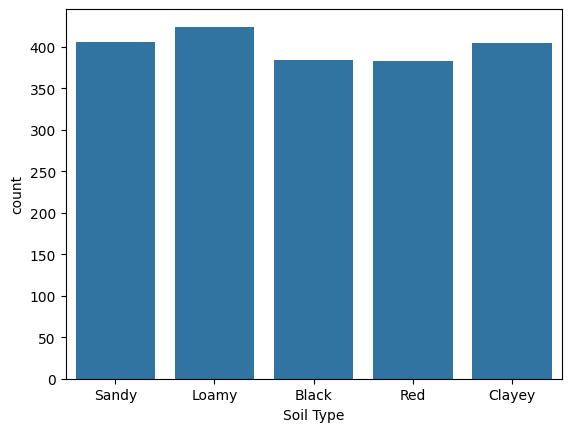

In [5]:
sns.countplot(x='Soil Type', data = df)


Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')


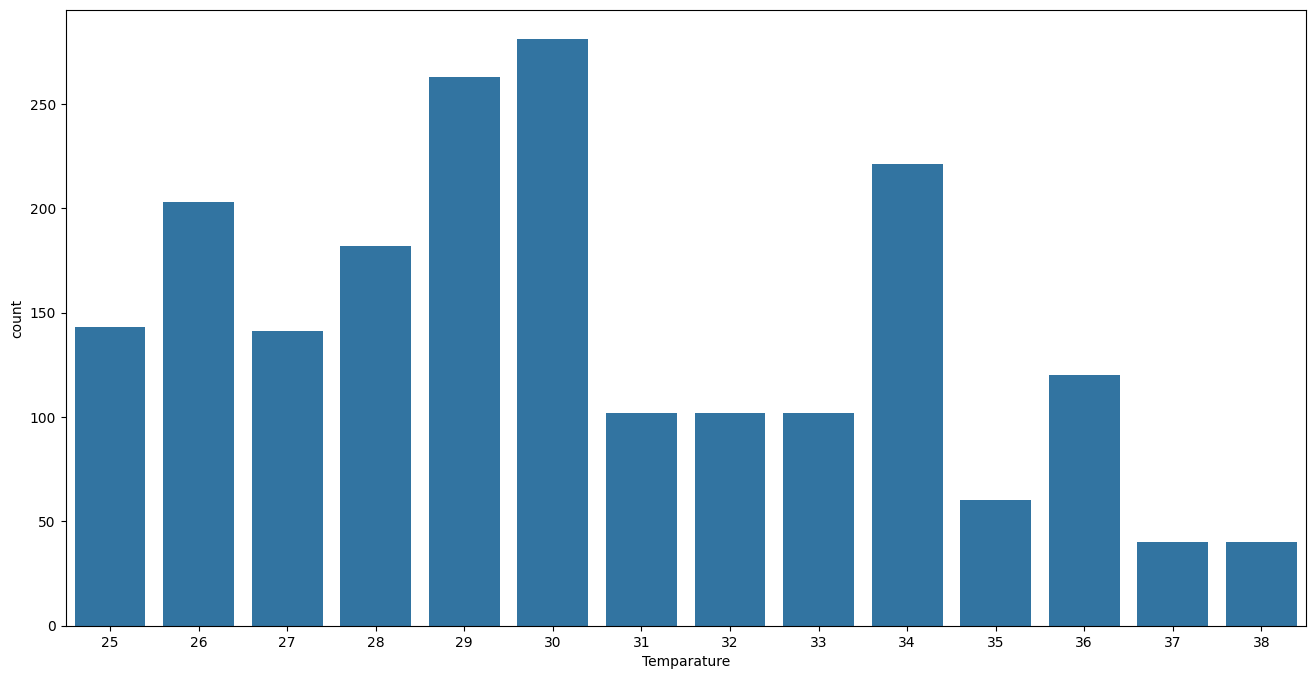

In [6]:
print(df.columns)


plt.figure(figsize=(16, 8))
sns.countplot(x='Temparature', data=df)
plt.show()

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')


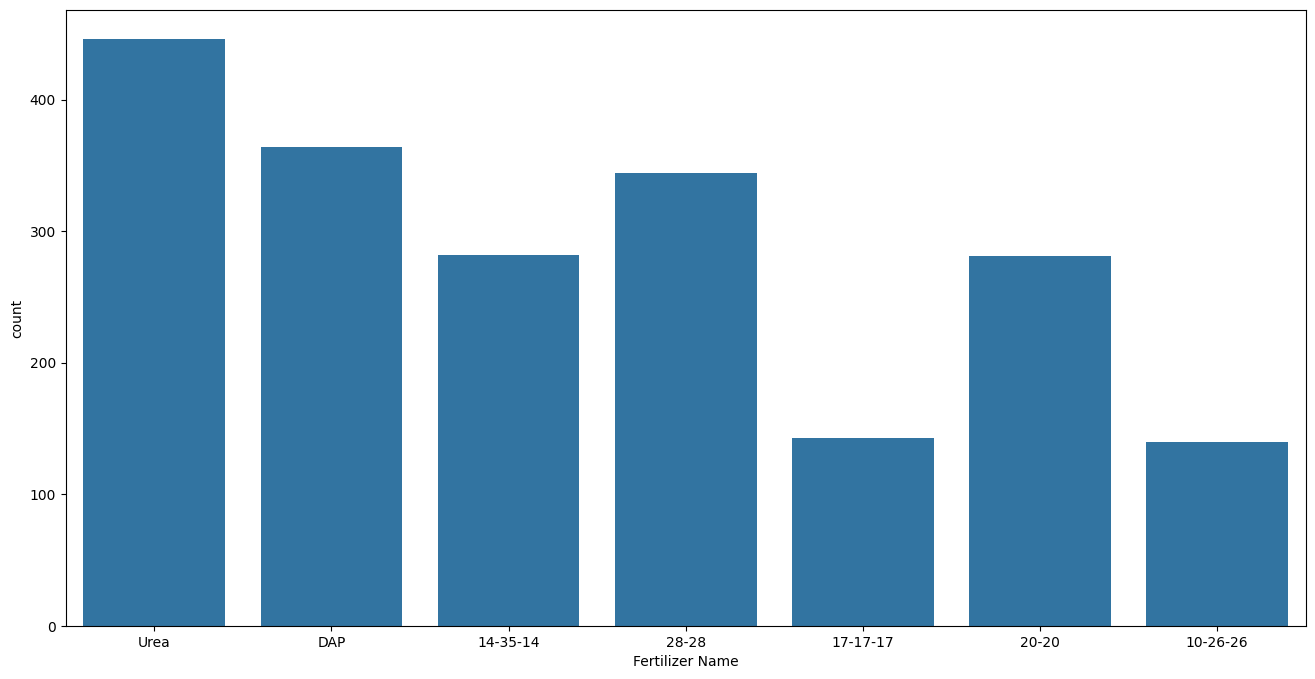

In [7]:
print(df.columns)


plt.figure(figsize=(16, 8))
sns.countplot(x='Fertilizer Name', data=df)
plt.show()


In [8]:
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = df['Fertilizer Name'])

def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = df['Fertilizer Name'], ax=axes[1])

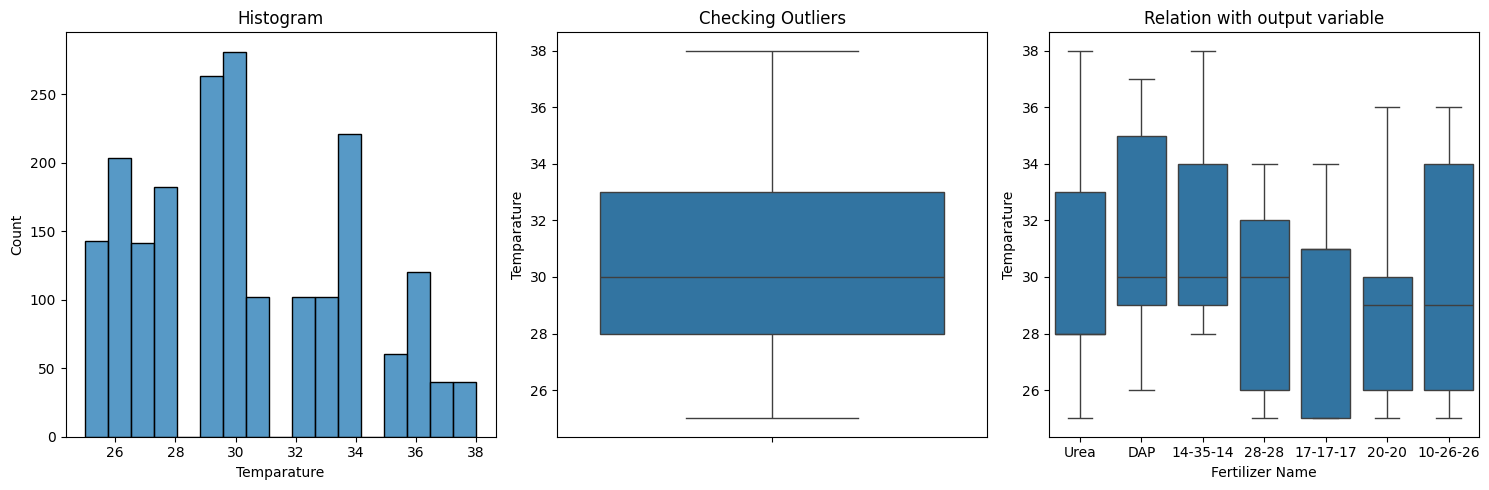

In [9]:
plot_conti(df['Temparature'])


<Axes: xlabel='Soil Type', ylabel='Temparature'>

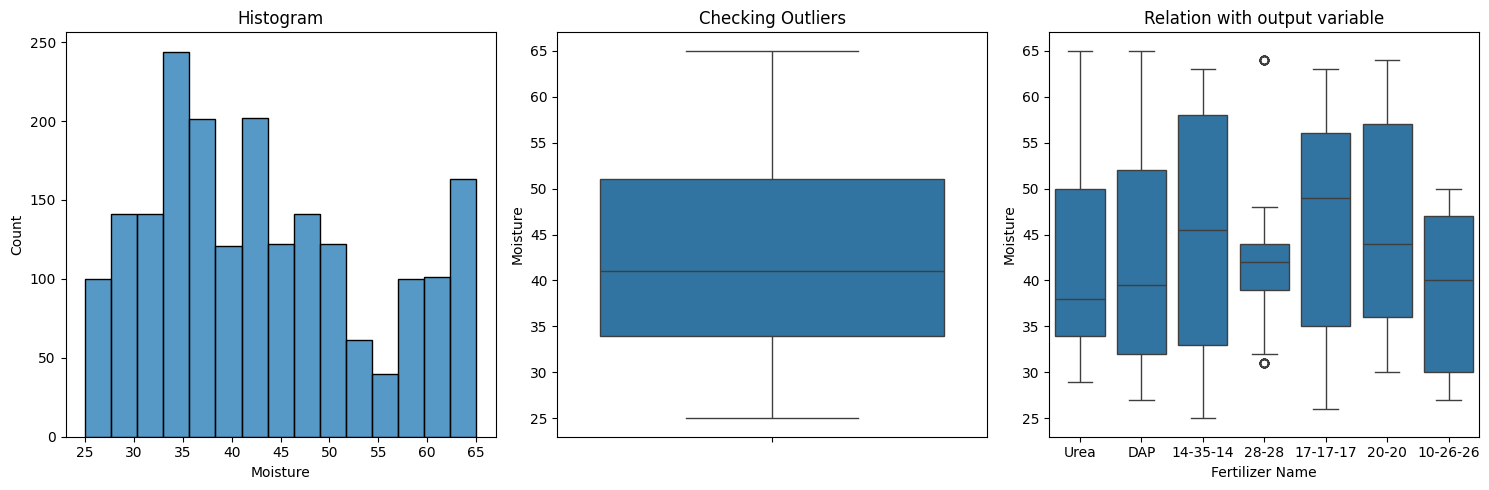

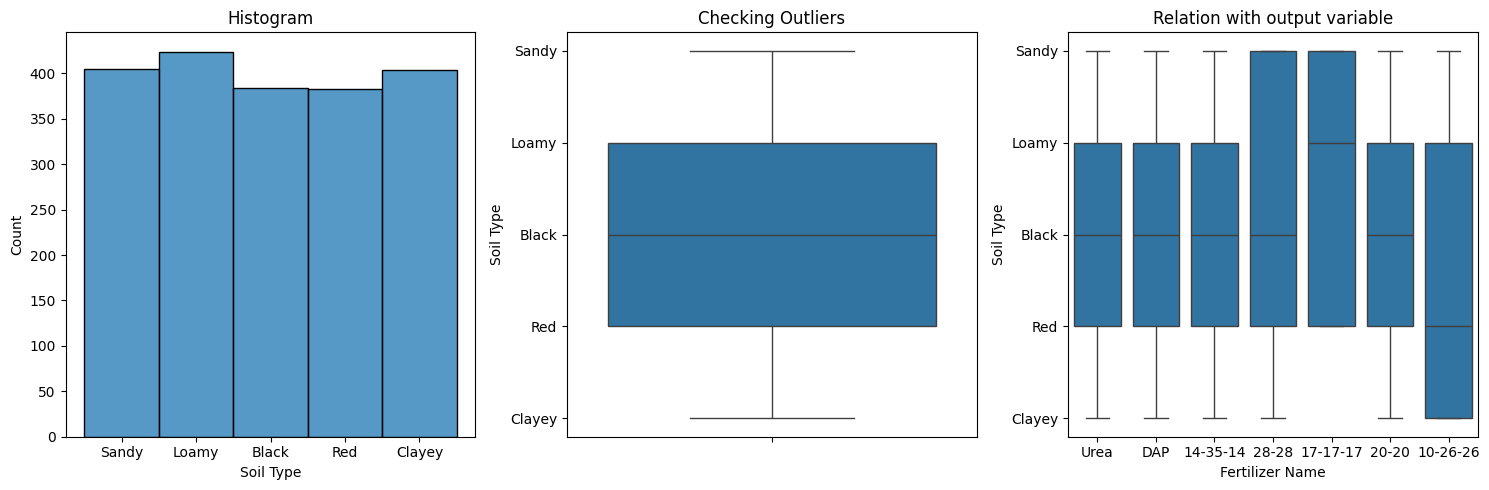

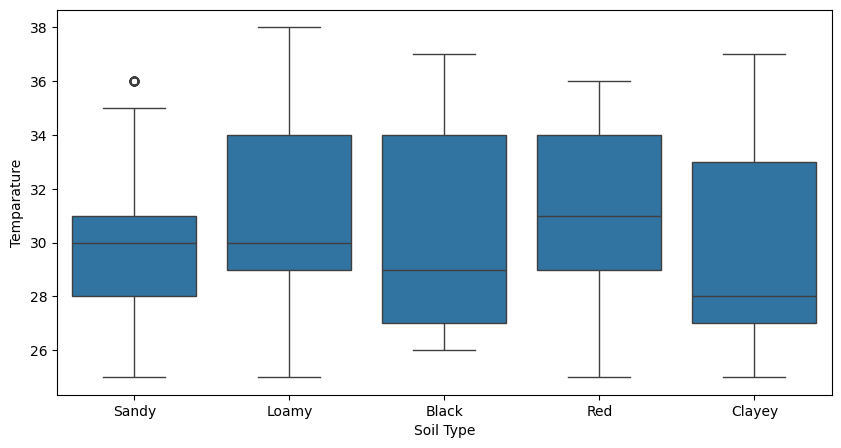

In [10]:
plot_conti(df['Moisture'])
plot_conti(df['Soil Type'])
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Soil Type'],y=df['Temparature'])

<Axes: xlabel='Soil Type', ylabel='Temparature'>

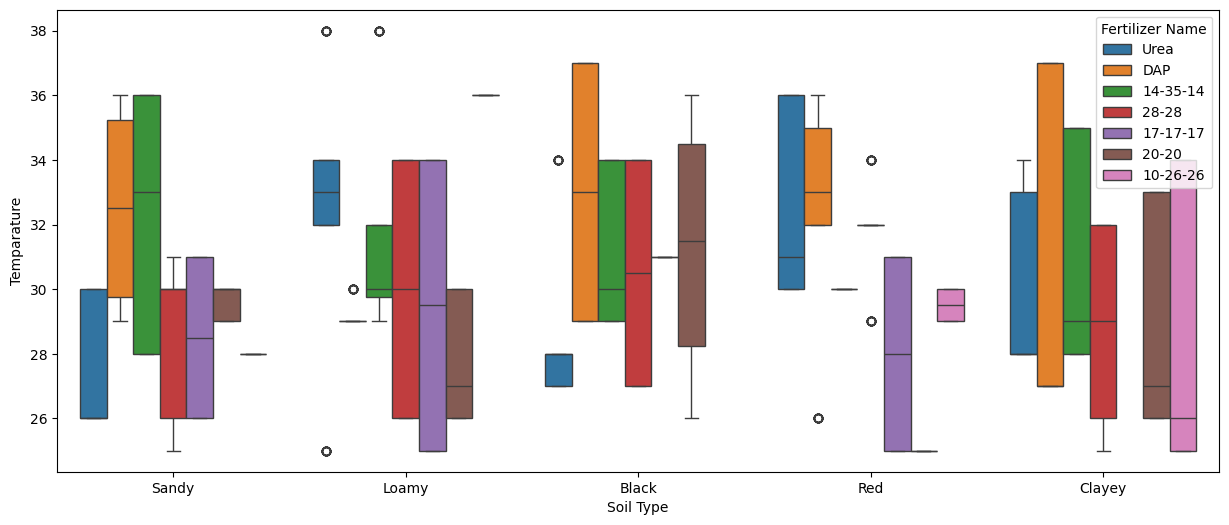

In [11]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Soil Type'],y=df['Temparature'],hue=df['Fertilizer Name'])


<Axes: xlabel='Crop Type', ylabel='Temparature'>

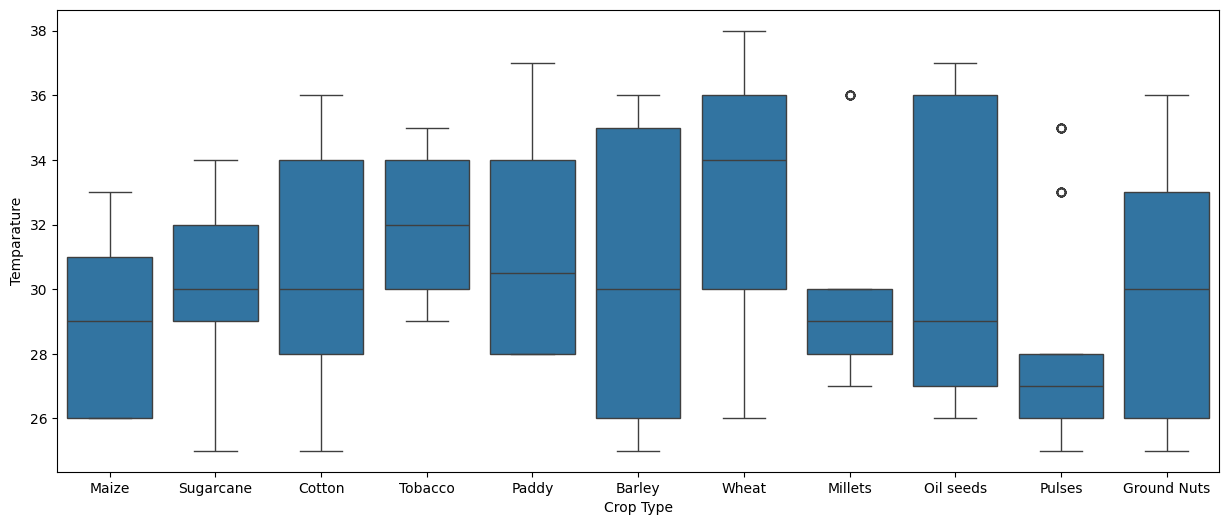

In [12]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Crop Type'],y=df['Temparature'])

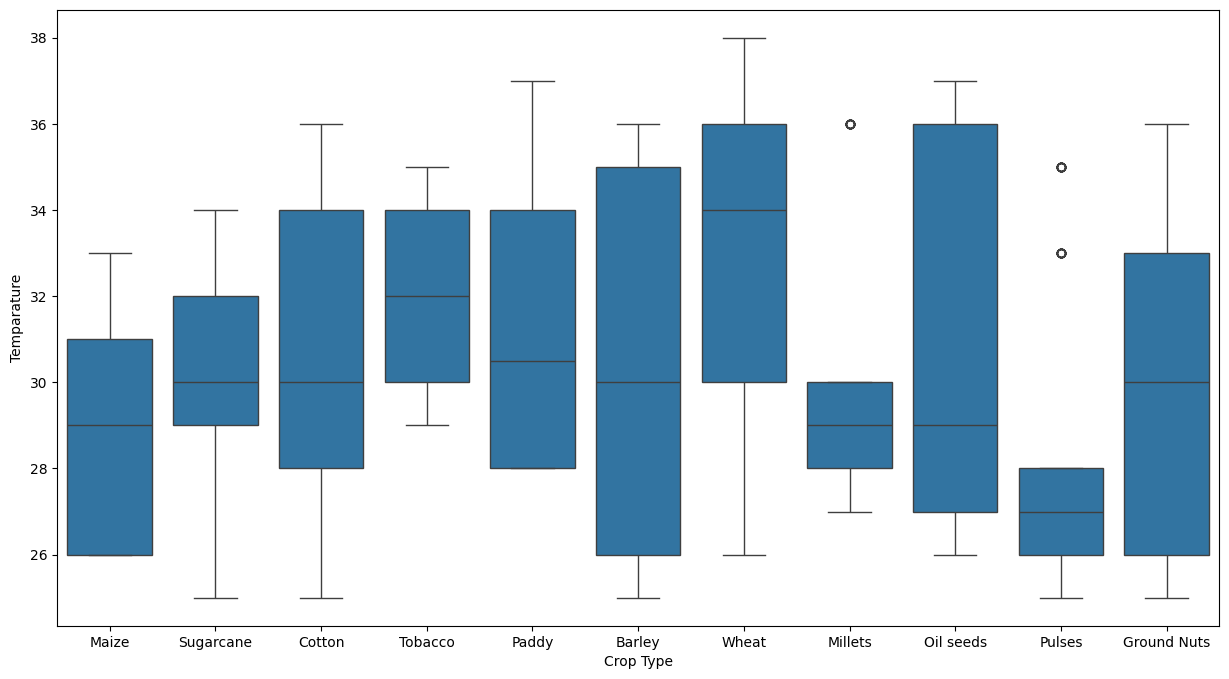

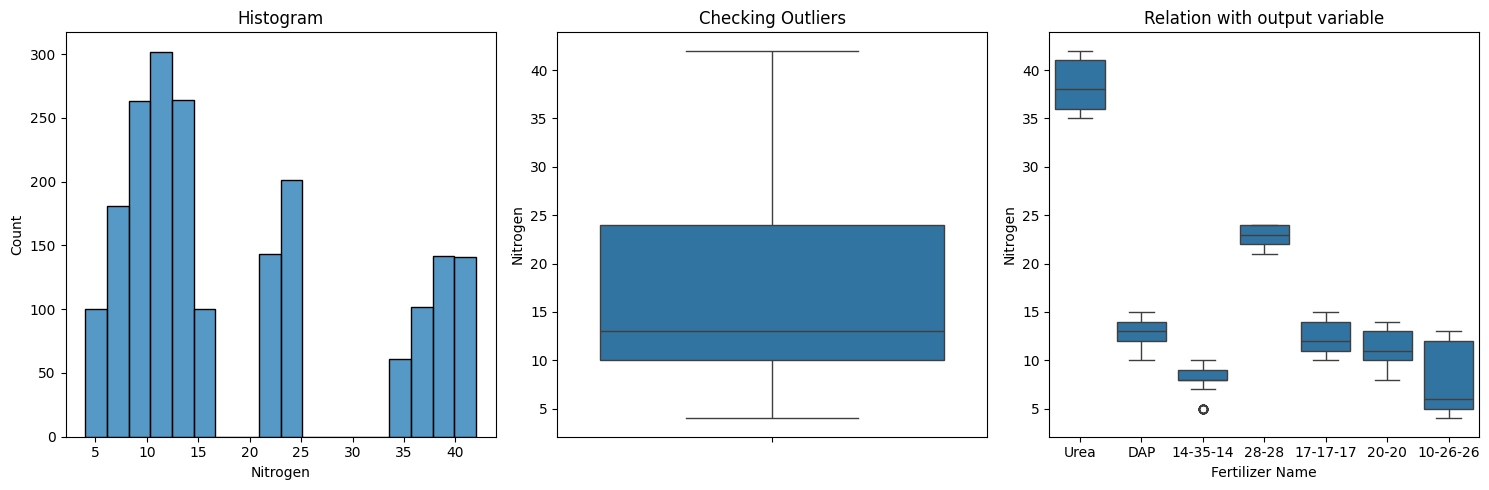

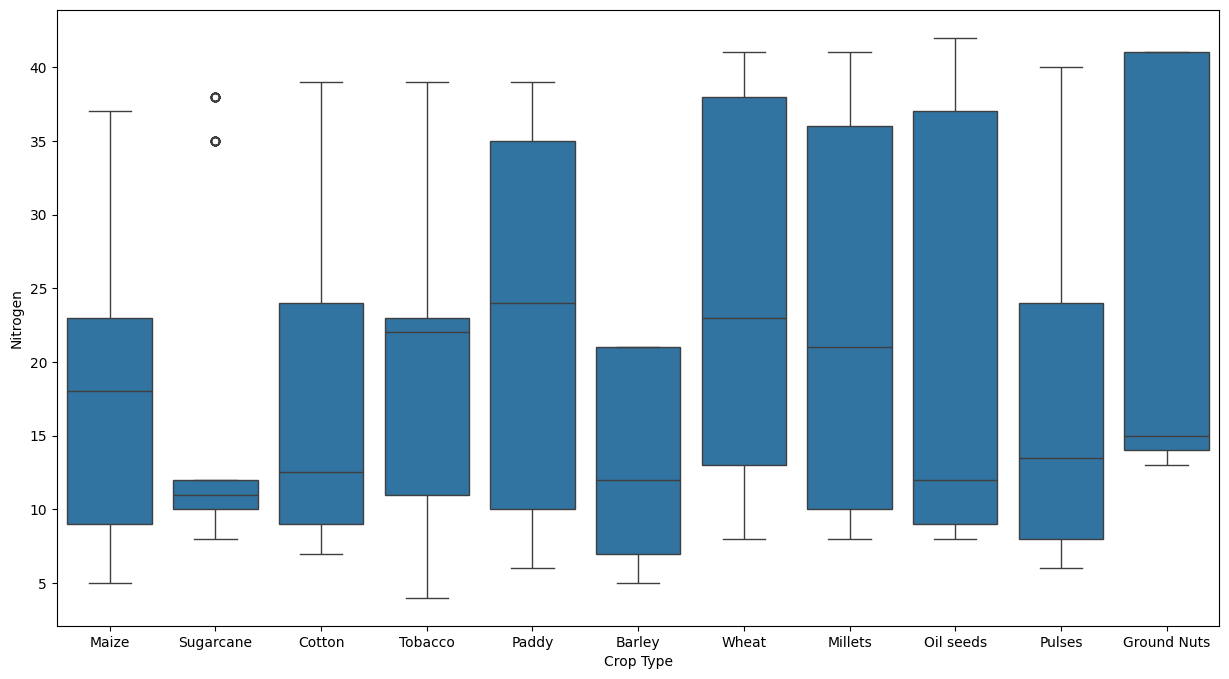

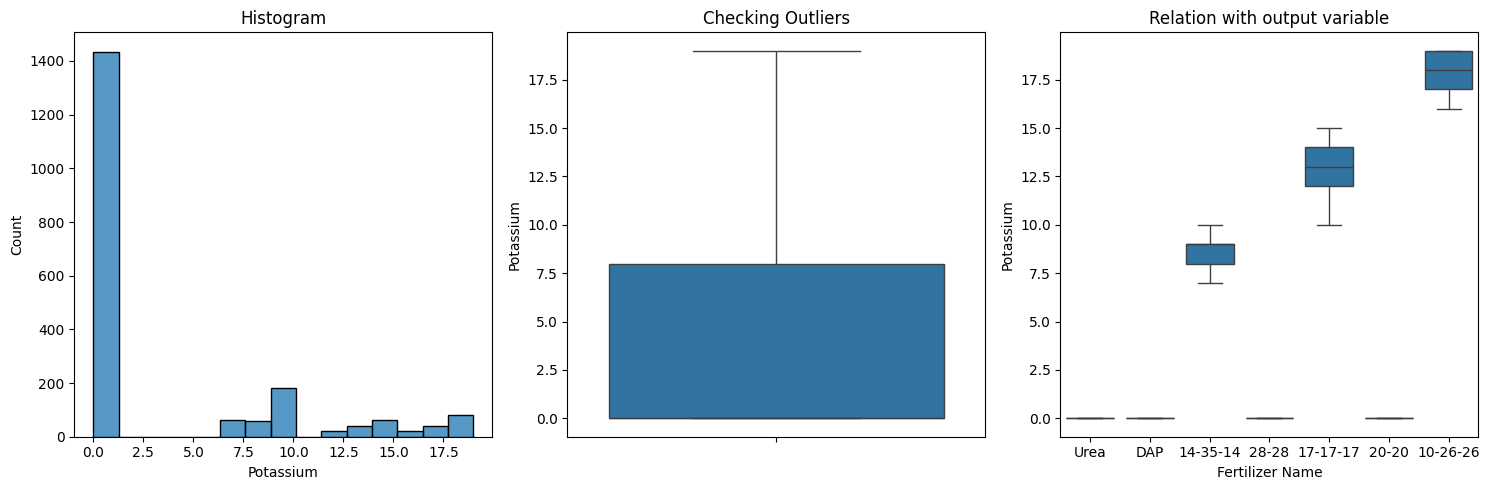

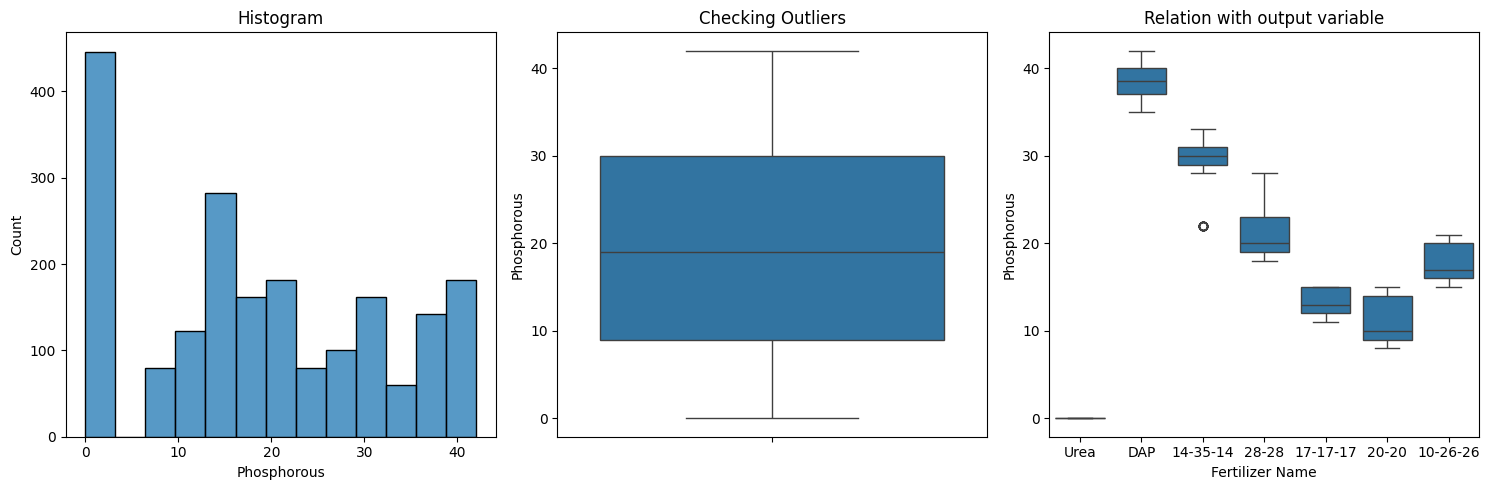

In [13]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Crop Type'],y=df['Temparature'])
plot_conti(df['Nitrogen'])
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Crop Type'],y=df['Nitrogen'])
plot_conti(df['Potassium'])
plot_conti(df['Phosphorous'])

In [14]:
X = df.drop('Fertilizer Name', axis=1).copy()
y = df['Fertilizer Name'].copy()

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3,4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=True, random_state=42)

In [17]:
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_noisy = sc.fit_transform(X_train_noisy)
X_test = sc.transform(X_test)

In [19]:
X_train_noisy[0]

array([-0.91566622, -0.8645216 , -0.25086395, -0.64284684,  1.57286398,
        1.85898847,  1.0040175 ,  1.97352293, -0.27944659,  0.10383188,
       -0.59616394,  0.72373314, -1.46419258, -1.05251882, -2.39808616,
        0.509245  ,  1.45968723,  1.28766271, -0.15013752, -0.73650959,
       -0.60877561,  1.20420733])

In [20]:
noise_factor_test = 0.3
X_test_noisy = X_test + noise_factor_test * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

In [21]:
rand = ExtraTreesClassifier(random_state = 42)
rand.fit(X_train_noisy,y_train)

ExtraTreesClassifier(random_state=42)

In [22]:
pred_rand = rand.predict(X_test_noisy)

In [23]:

import numpy as np
import pandas as pd
import warnings
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
warnings.filterwarnings("ignore")




params = {
    'n_estimators': [300, 400, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 8]
}

grid_rand = GridSearchCV(rand, params, cv=3, verbose=3, n_jobs=-1)


grid_rand.fit(X_train_noisy, y_train)

pred_rand = grid_rand.predict(X_test_noisy)


accuracy = accuracy_score(y_test, pred_rand)
print(f"Accuracy: {accuracy * 100:.2f}%")

print(classification_report(y_test, pred_rand))

print('Best score:', grid_rand.best_score_)
print('Best params:', grid_rand.best_params_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Accuracy: 96.50%
              precision    recall  f1-score   support

    10-26-26       0.96      0.90      0.93        73
    14-35-14       0.95      0.99      0.97       146
    17-17-17       0.92      0.87      0.89        63
       20-20       1.00      0.90      0.95       137
       28-28       0.97      0.98      0.98       167
         DAP       0.94      0.99      0.97       178
        Urea       0.98      1.00      0.99       236

    accuracy                           0.96      1000
   macro avg       0.96      0.95      0.95      1000
weighted avg       0.97      0.96      0.96      1000

Best score: 1.0
Best params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


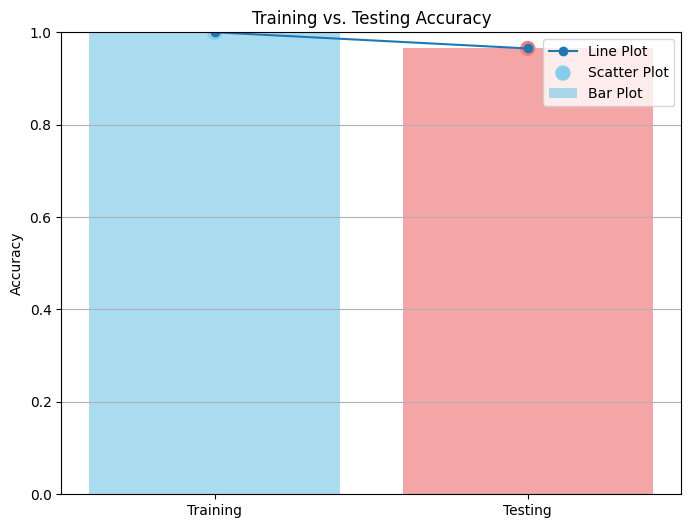

In [24]:
1
import matplotlib.pyplot as plt


training_accuracy = grid_rand.best_score_
testing_accuracy = accuracy_score(y_test, pred_rand)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(['Training', 'Testing'], [training_accuracy, testing_accuracy], marker='o', label='Line Plot')
ax.bar(['Training', 'Testing'], [training_accuracy, testing_accuracy], color=['skyblue', 'lightcoral'], alpha=0.7, label='Bar Plot')
ax.scatter(['Training', 'Testing'], [training_accuracy, testing_accuracy], s=100, c=['skyblue', 'lightcoral'], label='Scatter Plot')

ax.set_title('Training vs. Testing Accuracy')
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1)
ax.grid(axis='y')
ax.legend()
plt.show()


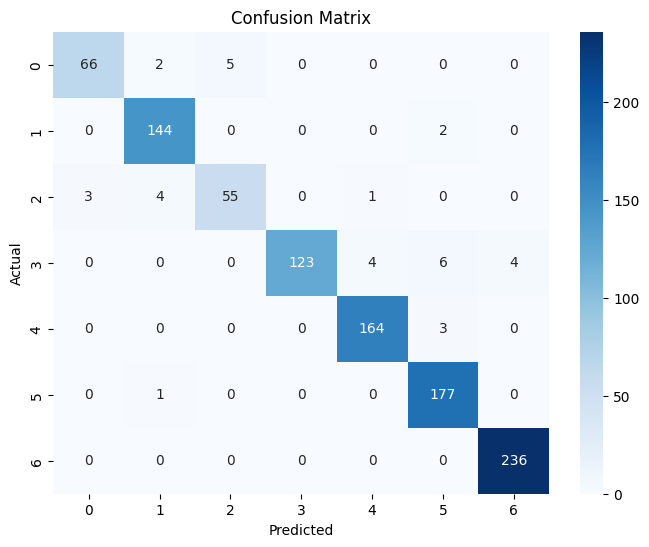

In [25]:

import matplotlib.pyplot as plt

y_true = y_test
y_pred = pred_rand
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [26]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("new dataset.csv")

X = df.drop('Fertilizer Name', axis=1).copy()
y = df['Fertilizer Name'].copy()

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3,4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=True, random_state=42)

noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)

sc = StandardScaler()
X_train_noisy = sc.fit_transform(X_train_noisy)
X_test = sc.transform(X_test)

noise_factor_test = 0.3
X_test_noisy = X_test + noise_factor_test * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

rand = ExtraTreesClassifier(random_state = 42)
rand.fit(X_train_noisy,y_train)


params = {
    'n_estimators': [300, 400, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 8]
}

grid_rand = GridSearchCV(rand, params, cv=3, verbose=3, n_jobs=-1)

grid_rand.fit(X_train_noisy, y_train)

pred_rand = grid_rand.predict(X_test_noisy)

accuracy = accuracy_score(y_test, pred_rand)
print(f"Accuracy: {accuracy * 100:.2f}%")

print(classification_report(y_test, pred_rand))

print('Best score:', grid_rand.best_score_)
print('Best params:', grid_rand.best_params_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Accuracy: 95.60%
              precision    recall  f1-score   support

    10-26-26       0.93      0.97      0.95        73
    14-35-14       0.92      0.95      0.93       146
    17-17-17       0.98      0.81      0.89        63
       20-20       0.99      0.91      0.95       137
       28-28       0.94      0.98      0.96       167
         DAP       0.92      0.97      0.94       178
        Urea       1.00      1.00      1.00       236

    accuracy                           0.96      1000
   macro avg       0.96      0.94      0.95      1000
weighted avg       0.96      0.96      0.96      1000

Best score: 1.0
Best params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


In [27]:
def predict_fertilizer(Temperature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Phosphorous, Potassium):
    user_input = pd.DataFrame({
        'Temparature': [Temperature],
        'Humidity ': [Humidity],
        'Moisture': [Moisture],
        'Soil Type': [Soil_Type],
        'Crop Type': [Crop_Type],
        'Nitrogen': [Nitrogen],
        'Phosphorous': [Phosphorous],
        'Potassium': [Potassium]
    })

    user_input_encoded = np.array(ct.transform(user_input))


    user_input_scaled = sc.transform(user_input_encoded)

    noise_factor_user = 0.3
    user_input_noisy = user_input_scaled + noise_factor_user * np.random.normal(loc=0.0, scale=1.0, size=user_input_scaled.shape)

    prediction = grid_rand.predict(user_input_noisy)

    return prediction[0]

temperature = float(input("Enter Temperature: "))
humidity = float(input("Enter Humidity: "))
moisture = float(input("Enter Moisture: "))
soil_type = input("Enter Soil Type: ")
crop_type = input("Enter Crop Type: ")
nitrogen = float(input("Enter Nitrogen: "))
phosphorous = float(input("Enter Phosphorous: "))
potassium = float(input("Enter Potassium: "))


predicted_fertilizer = predict_fertilizer(temperature, humidity, moisture, soil_type, crop_type, nitrogen, phosphorous, potassium)
print(f"The recommended fertilizer is: {predicted_fertilizer}")

Enter Temperature: 26
Enter Humidity: 30
Enter Moisture: 30
Enter Soil Type: Red
Enter Crop Type: Sugarcane
Enter Nitrogen: 6
Enter Phosphorous: 5
Enter Potassium: 4
The recommended fertilizer is: 17-17-17


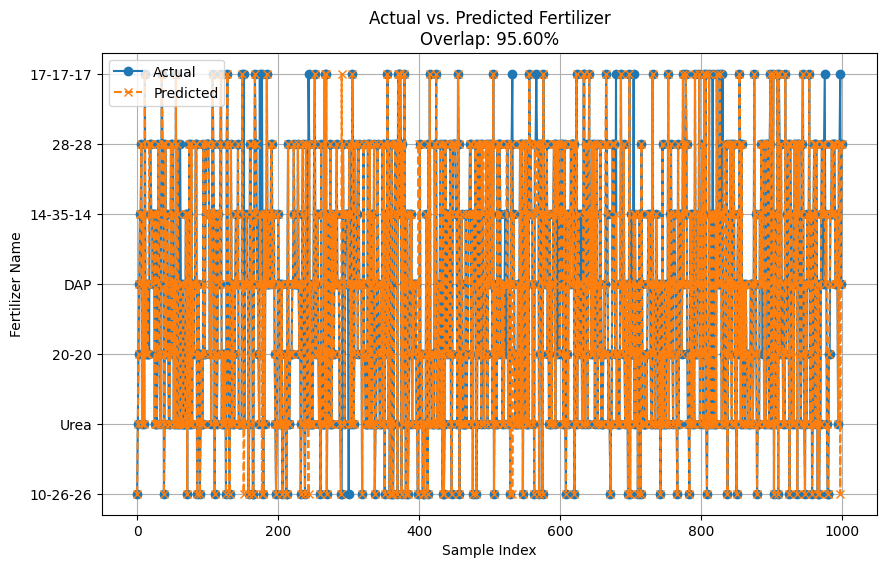

In [28]:

import matplotlib.pyplot as plt

x_values = range(len(y_test))
y_actual = [i for i in y_test]
y_predicted = [i for i in pred_rand]


overlap_count = sum(1 for a, b in zip(y_test, pred_rand) if a == b)
overlap_percentage = (overlap_count / len(y_test)) * 100

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_actual, marker='o', linestyle='-', label='Actual')
plt.plot(x_values, y_predicted, marker='x', linestyle='--', label='Predicted')

plt.xlabel("Sample Index")
plt.ylabel("Fertilizer Name")
plt.title(f"Actual vs. Predicted Fertilizer\nOverlap: {overlap_percentage:.2f}%")
plt.legend()
plt.grid(True)
plt.show()


In [29]:
import pickle

# Assign the trained model to the 'model' variable
model = grid_rand

# Train or load your ML model (make sure 'model' exists)
with open("Final_Fertilizer_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully!")

Model saved successfully!
